In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
plt.style.use('ggplot')
import tensorflow as tf
#import tensorflow_probability as tfp
from sklearn.cluster import KMeans, DBSCAN
from IPython import display
from time import sleep
import sklearn
from sklearn import preprocessing
# from sklearn.manifold import TSNE
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from tqdm import tqdm
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import operator
#from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
import heapq
from gensim.models.coherencemodel import CoherenceModel
import random
import math
#import spacy
import datetime
from nltk import bigrams
from collections import Counter
from itertools import permutations, combinations
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_20newsgroups
#import fasttext
from sklearn.metrics import confusion_matrix, adjusted_rand_score, rand_score
#import seaborn as sns

# import tensorflow as tf
# import keras
# import tensorflow_probability as tfp
# from keras.layers import Input, Concatenate, Dense, Dropout
# from keras.models import Model
# from keras.optimizers import Adam
import fasttext
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test = pd.read_csv('r8-test-stemmed.csv')
train = pd.read_csv('r8-train-stemmed.csv')

In [3]:
docs = [train.text.values.tolist() + test.text.values.tolist()]
labels = [train.intent.values.tolist() + test.intent.values.tolist()]

In [4]:
docs = docs[0]
labels = labels[0]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = CountVectorizer(binary=True, min_df=0.)#, tokenizer = LemmaTokenizer()) 25
# vectorizer = TfidfVectorizer(stop_words='english', min_df = .02, max_df = .95)#, tokenizer = LemmaTokenizer()) # to reduce the vocabulary size
binary_matrix = vectorizer.fit_transform(docs).toarray()
len(vectorizer.get_feature_names_out())

16698

In [ ]:
# pd.DataFrame(np.column_stack((docs, np.repeat('train', len(docs))))).to_csv('corpus_20newss.tsv', header=None, index = False)

In [ ]:
# vocab = []
# for doc in docs:
#     for word in doc.split(' '):
#         if word not in vocab: 
#             vocab.append(word)

In [ ]:
# file = open('vocabulary20.txt','w')
# file.writelines(vocab)
# file.close()

In [7]:
np.array([len(doc.split(' ')) for doc in docs]).mean()
np.array([len(doc.split(' ')) for doc in docs]).std()

66.96842447477621

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = CountVectorizer(binary=True, min_df = 10)#, tokenizer = LemmaTokenizer()) 25
# vectorizer = TfidfVectorizer(stop_words='english', min_df = .02, max_df = .95)#, tokenizer = LemmaTokenizer()) # to reduce the vocabulary size
binary_matrix = vectorizer.fit_transform(docs).toarray()
binary_df = pd.DataFrame(binary_matrix, columns = vectorizer.get_feature_names_out())
binary_df = binary_df.loc[:, list(binary_df.columns)]

In [ ]:
binary_df

In [ ]:
# liss = list(binary_df.columns)
# file = open('columns_20fetch.txt','w')
# for item in liss:
#     file.write(item+"\n")
# file.close()

In [ ]:
# file_path = "corpus_20fetch.txt"

# # Open the file in write mode
# with open(file_path, "w", encoding="utf-8") as file:
#     # Write each document to the file, one line at a time
#     file.write(' '.join(docs))

In [ ]:
# Imposta i parametri di addestramento
# dimension = 100  # Cambia questo valore a seconda delle tue esigenze
# epoch = 100

# # Addestramento del modello FastText
# nlp = fasttext.train_unsupervised('corpus_20fetch.txt', dim=dimension, epoch=epoch)
# nlp.save_model('prova.bin')

In [10]:
words_to_consider = np.array(list(binary_df.columns))#.reshape(-1, 1)
nlp = fasttext.load_model('fasttext_20fetch.bin')

In [11]:
def generate_word_embeddings(word_list):
    word_embeddings = []
    for word in word_list:
        token = nlp.get_word_vector(word)
        word_embeddings.append(token)

    return word_embeddings

ww = [str(w) for w in words_to_consider]
word_embeddings = generate_word_embeddings(ww)

In [ ]:
# cosines = []
# for i, word in enumerate(word_embeddings):
#     for j, word_to_compared in enumerate(word_embeddings):
#         if i != j:
#             cosines.append([words_to_consider[i], words_to_consider[j],cosine_similarity([word], [word_to_compared])[0][0]])

In [ ]:
# cosines_df = pd.DataFrame(cosines, columns = ['Node1', 'Node2', 'cosine_similarity'])
# cosines_df

In [ ]:
# pivot_table = pd.pivot_table(cosines_df, values='cosine_similarity', index='Node1', columns='Node2')
# pivot_table = pivot_table.fillna(0)
# pivot_table
# pivot_table.t0_csv('pivot_fetch2.csv')

In [ ]:
pivot_table = pd.read_csv('pivot_fetch.csv')
pivot_table.drop('Node1', axis = 1, inplace = True)
pivot_table = pivot_table.set_index(pivot_table.columns)
pivot_table = pivot_table.set_index(pivot_table.index)

In [ ]:
n_clusters =  20

In [ ]:
def find_seed_words(top_N, first_K):
    mean_df = pd.DataFrame()

    for index, row in pivot_table.iterrows():
        mean_value = row.sort_values(ascending=False)[:first_K].mean()
        mean_df.loc[index, 'mean'] = mean_value

    mean_df = mean_df.sort_values('mean', ascending=False).iloc[:top_N]
    return list(mean_df.index)
seed_words = find_seed_words(350, 15)#350, 15

In [ ]:
embeddings = pivot_table.loc[seed_words, seed_words]

In [ ]:
# from sklearn.decomposition import PCA
# umap = UMAP(n_components=20, random_state = 0) 
# umap.fit(embeddings)
# embeddings_umap = umap.transform(embeddings)

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_ = kmeans.fit(embeddings.values)
cluster_kmeans = kmeans_.labels_

In [ ]:
plt.hist(cluster_kmeans, bins = n_clusters)

In [ ]:
cluster_dict = {}
for i, clus in enumerate(cluster_kmeans):
    if clus not in cluster_dict:
        cluster_dict[clus] = []
    cluster_dict[clus].append(seed_words[i])

In [ ]:
n_combinations = 3
matching_docs = {}

# Iterazione sui documenti
for idx, doc in enumerate(docs):
    word_counts = {cluster: [] for cluster in cluster_dict.keys()}  # Inizializzazione parole per cluster

    # Conteggio delle parole del documento presenti in ogni cluster
    for cluster, word_list in cluster_dict.items():
        for word in word_list:
            if word.lower() in doc.lower():
                word_counts[cluster].append(word)

    # Verifica se il documento contiene almeno tre parole di uno stesso cluster
    for cluster, words in word_counts.items():
        if len(words) >= n_combinations:
            if idx in matching_docs:
                matching_docs[idx][cluster] = words
            else:
                matching_docs[idx] = {cluster: words}

In [ ]:
def return_input2(triplet):
    vector = np.zeros(binary_df.shape[1])
    for word in triplet:
        vector[word_to_consider[word]] = 1
    return vector

def return_random_triplets(matching, K):
    combinations_words = list(combinations(matching, n_combinations))
    return random.sample(combinations_words, k=min(K, len(combinations_words)))

In [ ]:
word_to_consider = {}
for i, word in enumerate(list(binary_df.columns)):
    word_to_consider[word] = i

In [ ]:
K = 5
input1 = []
input2 = []
out = []
yy = []
idx_corp = []
for key in matching_docs: #key sono gli indici del dataset
    for value in matching_docs[key]:
        list_triplets = return_random_triplets(matching_docs[key][value], K) # triplette random
        for i in range(len(list_triplets)): #triplette per ciascun cluster
            
            idx_corp.append(key)
            input1.append(np.array(binary_df.iloc[key, :]))
            input2.append(return_input2(list(list_triplets[i])))
            out.append(value)

In [ ]:
import keras
input1 = np.array(input1, dtype=np.float32)
input2 = np.array(input2, dtype=np.float32)
out = keras.utils.to_categorical(np.array(out), dtype=np.float32)
inputs_stack = np.column_stack((input1, input2))

In [ ]:
input1.shape

In [ ]:
plt.hist(out.argmax(axis = 1), n_clusters)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
class_counts = Counter(out.argmax(axis=1))
min_class_count = min(class_counts.values())
desired_count = 2 * min_class_count

sampling_strategy = {cls: min(count, desired_count) for cls, count in class_counts.items()}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = rus.fit_resample(inputs_stack, out)

In [ ]:
plt.hist(y_resampled.argmax(axis = 1), n_clusters)

In [ ]:
X_resampled.shape

## Explainable Topic Modelling

In [ ]:
X_pred = np.eye(binary_df.shape[1])
X_pred1 = np.zeros((binary_df.shape[1], binary_df.shape[1]))

In [ ]:
lgbm_clf = lgb.LGBMClassifier(seed = 0, random_state=0, )
xgb_clf = XGBClassifier(random_state=0)
cat_clf = CatBoostClassifier(verbose = False, random_seed=0)#BalancedAccuracy
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 1000 ) 
et_clf = ExtraTreesClassifier(random_state=0, n_estimators = 500, n_jobs = -1)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=512, random_state=0)

In [ ]:
list_of_models = [lgbm_clf, xgb_clf, cat_clf, rf_clf, et_clf, mlp]

In [ ]:
def extract_topic_representations(predictions):
    sorted_indices = np.argsort(predictions, axis=0)[::-1]
    top_10_indices = sorted_indices[:25, :]
    topic_representations = [np.array(list(binary_df.columns))[list(top_10_indices[:, i_col])] for i_col in range(n_clusters) ]
    return topic_representations

In [ ]:
def calculate_topic_diversity(topics):
    # Creazione di una lista di tutte le parole nei topic
    all_words = [word for topic in topics for word in topic]

    # Calcolo del numero totale di parole considerate
    total_words = len(all_words)

    # Calcolo del numero di parole uniche
    unique_words = len(set(all_words))

    # Calcolo della diversità dei topic
    diversity_score = unique_words / total_words

    return diversity_score

def create_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    # Define labels for the matrix
    labels = np.unique(actual)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))

    # Create heatmap
    heatmap = ax.imshow(cm, cmap='Blues')

    # Set ticks and tick labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

    # Add colorbar
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    # Remove grid
    ax.grid(False)
    # Set labels and title
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")

    # Display the plot
    plt.show()

In [ ]:
# predictions = clf.predict(np.column_stack((binary_df.values, binary_df.values)))
clf = MLPClassifier(random_state=0)
clf = RandomForestClassifier()
#clf = list_of_models[0]
clf.fit(X_resampled, np.argmax(y_resampled, axis = 1))
#predictions_prob = clf.predict_proba(np.column_stack((binary_df.values, np.zeros(binary_df.values.shape))))
predictions_prob = clf.predict_proba(np.column_stack((binary_df.values, binary_df.values)))
#predictions_prob = clf.predict_proba(np.column_stack((np.zeros(binary_df.values.shape), binary_df.values)))
predictions = predictions_prob.argmax(axis = 1)

In [ ]:
cm = confusion_matrix(labels, predictions)
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print((cm.max(axis = 1)/cm.sum(axis = 1)).mean())
print(adjusted_rand_score(labels, predictions))
print(rand_score(labels, predictions))

In [ ]:
sklearn.metrics.homogeneity_completeness_v_measure(labels,predictions)

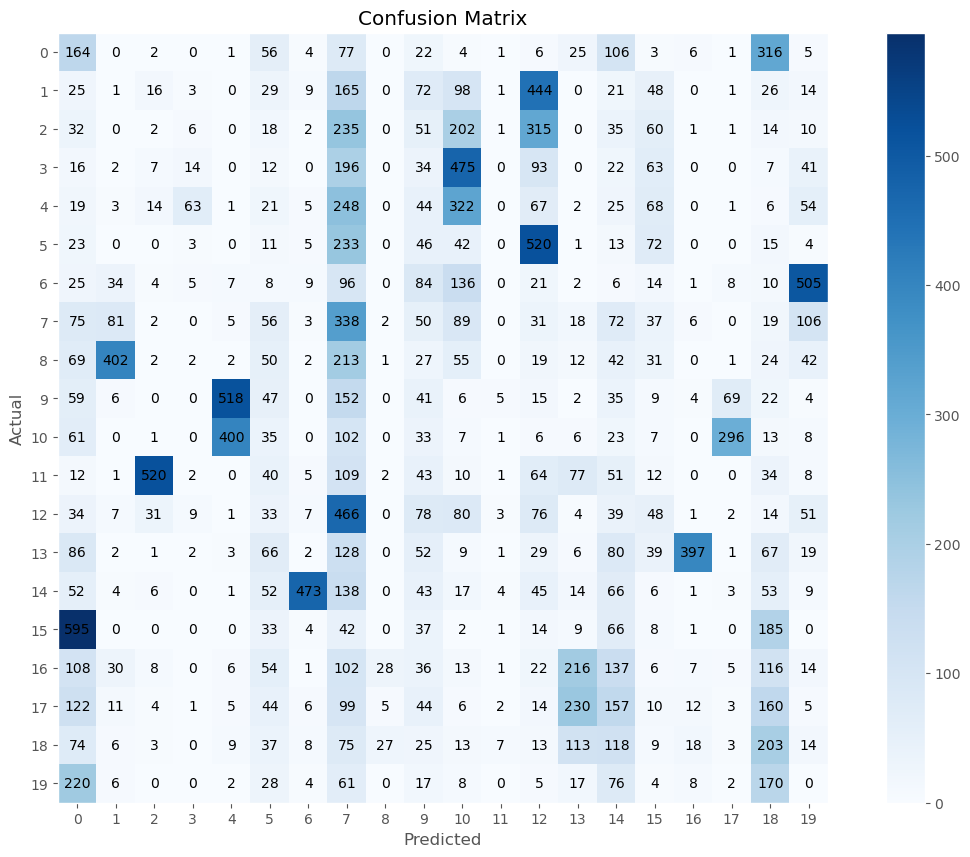

In [259]:
create_cm(labels, predictions)

In [58]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import fowlkes_mallows_score

# Assuming 'labels' are your true labels and 'predictions' are your cluster assignments
adjusted_rand = adjusted_rand_score(labels, predictions)
nmi = normalized_mutual_info_score(labels, predictions)
homogeneity = homogeneity_score(labels, predictions)
completeness = completeness_score(labels, predictions)
v_measure = v_measure_score(labels, predictions)
fowlkes_mallows = fowlkes_mallows_score(labels, predictions)

print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")
print(f"Fowlkes-Mallows Index: {fowlkes_mallows}")


Adjusted Rand Index: 0.16511909010314918
Normalized Mutual Information: 0.306027154710265
Homogeneity: 0.2958512379563395
Completeness: 0.31692801530145986
V-Measure: 0.306027154710265
Fowlkes-Mallows Index: 0.21733596996194052


In [61]:
predictions = kmeans_se.labels_
adjusted_rand = adjusted_rand_score(labels, predictions)
nmi = normalized_mutual_info_score(labels, predictions)
homogeneity = homogeneity_score(labels, predictions)
completeness = completeness_score(labels, predictions)
v_measure = v_measure_score(labels, predictions)
fowlkes_mallows = fowlkes_mallows_score(labels, predictions)

print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Normalized Mutual Information: {nmi}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")
print(f"Fowlkes-Mallows Index: {fowlkes_mallows}")

Adjusted Rand Index: 0.22404715517159332
Normalized Mutual Information: 0.3723036508160047
Homogeneity: 0.3700291226818596
Completeness: 0.3746063144421856
V-Measure: 0.3723036508160047
Fowlkes-Mallows Index: 0.2647186815418154


In [95]:
clf = list_of_models[3]
clf.fit(X_resampled, np.argmax(y_resampled, axis = 1))
# clf.fit(inputs_stack, np.argmax(out, axis = 1))
predictions = clf.predict_proba(np.column_stack((X_pred, X_pred)))
topic_representations = extract_topic_representations(predictions)
documents = [doc.split() for doc in docs]
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print('xxx')
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_npmi')
coherence_npmi = cm.get_coherence()
print(f'Topic Coherence C_NPMI: {coherence_npmi}')
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_uci')
coherence_uci = cm.get_coherence()
print(f'Topic Coherence C_UCI: {coherence_uci}')
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_v')
coherence_cv = cm.get_coherence()
print(f'Topic Coherence C_V: {coherence_cv}')
coherence_div = calculate_topic_diversity(topic_representations)
print('Topic diveristy is: {}'.format(calculate_topic_diversity(topic_representations)))

xxx
Topic Coherence C_NPMI: 0.04144686963987655
Topic Coherence C_UCI: -0.9847516032507532
Topic Coherence C_V: 0.5793191994628846
Topic diveristy is: 0.946


In [126]:
def extract_topic_representations(predictions):
    sorted_indices = np.argsort(predictions, axis=0)[::-1]
    top_10_indices = sorted_indices[:10, :]
    topic_representations = [np.array(list(binary_df.columns))[list(top_10_indices[:, i_col])] for i_col in range(n_clusters) ]
    return topic_representations
predictions = clf.predict_proba(np.column_stack((X_pred, X_pred)))
topic_representations = extract_topic_representations(predictions)
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_npmi')
coherence_npmi = cm.get_coherence()
print(f'Topic Coherence C_NPMI: {coherence_npmi}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Topic Coherence C_NPMI: 0.13457255774367968


In [135]:
import random

def swap_words_in_arrays(arrays, swap_percentage):
    # Calcola il numero totale di parole e il numero di parole da scambiare
    total_words = sum(len(arr) for arr in arrays)
    words_to_swap = int(total_words * swap_percentage / 100)

    # Crea una lista di tutte le parole con i loro indici di array e posizione
    all_words = [(word, array_idx, word_idx) for array_idx, arr in enumerate(arrays) for word_idx, word in enumerate(arr)]

    # Esegue gli scambi
    for _ in range(words_to_swap):
        # Seleziona due parole casuali da scambiare
        word1, word2 = random.sample(all_words, 2)

        # Scambia le parole
        arrays[word1[1]][word1[2]], arrays[word2[1]][word2[2]] = arrays[word2[1]][word2[2]], arrays[word1[1]][word1[2]]

    return arrays

# Scambia il 10% delle parole
swap_percentage = 100
modified_arrays = swap_words_in_arrays(topic_representations, swap_percentage)

# Stampa gli array modificati
for arr in modified_arrays:
    print(arr)


['treatment' 'court' 'bike' 'heaven' 'running' 'patient' 'orbit'
 'constitution' 'circuit' 'site']
['brand' 'address' 'steering' 'resistor' 'great' 'sale' 'crime' 'wire'
 'hockey' 'proof']
['fact' 'claim' 'place' 'state' 'clipper' 'rear' 'sexuality' 'objective'
 'problem' 'secure']
['people' 'wiring' 'works' 'card' 'message' 'format' 'voltage' 'posted'
 'color' 'serial']
['national' 'eternal' 'true' 'transformer' 'riding' 'shaw' 'professor'
 'father' 'lord' 'clinical']
['morality' 'federal' 'institute' 'real' 'doctrine' 'read' 'disk'
 'medicine' 'long' 'solar']
['advance' 'memory' 'sexual' 'security' 'access' 'spirit' 'pitcher'
 'shipping' 'display' 'religion']
['find' 'horizontal' 'correct' 'mail' 'constitutional' 'file' 'genocide'
 'post' 'contact' 'money']
['satellite' 'chronic' 'president' 'standard' 'interface' 'sense' 'love'
 'person' 'therapy' 'statement']
['note' 'graphics' 'encryption' 'point' 'pulse' 'monitor' 'shuttle'
 'extermination' 'university' 'catholic']
['version' 'bo

In [136]:
cm = CoherenceModel(topics=modified_arrays, texts = documents, dictionary = dictionary, coherence='c_npmi')
coherence_npmi = cm.get_coherence()
print(f'Topic Coherence C_NPMI: {coherence_npmi}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Topic Coherence C_NPMI: -0.1934593413675254


In [137]:
def extract_topic_representations(predictions):
    sorted_indices = np.argsort(predictions, axis=0)[::-1]
    top_10_indices = sorted_indices[:10, :]
    topic_representations = [np.array(list(binary_df.columns))[list(top_10_indices[:, i_col])] for i_col in range(n_clusters) ]
    return topic_representations, top_10_indices

In [138]:
li = [topic.tolist() for topic in topic_representations]
embeddings_topics = np.array([model.encode(words) for words in li])

In [53]:
# cosine similarity approach
# predictions = []
# for embedding in embeddings_se:
#     cos = []
#     for i, emb in enumerate(embeddings_topics): 
#         pp = np.average(emb[:10], weights=weights[i, :10], axis = 0)
#         cos.append(cosine_similarity([embedding, pp])[0][1])
#     predictions.append(np.array(cos).argmax())

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
embs = pca.fit_transform(np.row_stack((embeddings_topics.mean(axis = 1), embeddings_se)))
embs_topics = embs[:20]
embs = embs[20:]

In [106]:
# from sklearn.semi_supervised import LabelSpreading
# label_prop_model = LabelSpreading(alpha= .1,max_iter = 60, n_jobs=-1)
# final_data = np.row_stack((embs_topics, embs))
# y_labs = np.concatenate((np.repeat(np.arange(20), 25), np.repeat(-1, len(embeddings_se))))
# label_prop_model.fit(final_data, y_labs)
# predictions = label_prop_model.predict(final_data)[20*25:]

In [282]:
predictions = []
for embedding in embs: #embeddings_se
    cos = []
    for emb in embs_topics:#embeddings_topics: 
        cos.append(cosine_similarity([embedding, emb[:30]])[0][1])
    predictions.append(np.array(cos).argmax())

In [283]:
print(adjusted_rand_score(labels, predictions))
print(sklearn.metrics.homogeneity_completeness_v_measure(labels,predictions))

0.2125893307147112
(0.31929009110460105, 0.3444540841431276, 0.33139507662380047)


In [140]:
from sklearn.semi_supervised import LabelSpreading
label_prop_model = LabelSpreading(alpha= .1,max_iter = 60, n_jobs=-1)
final_data = np.row_stack((embs_topics, embs))
y_labs = np.concatenate((np.arange(20), np.repeat(-1, len(embeddings_se))))
label_prop_model.fit(final_data, y_labs)
predictions = label_prop_model.predict(final_data)[20:]

In [141]:
print(adjusted_rand_score(labels, predictions))
print(sklearn.metrics.homogeneity_completeness_v_measure(labels,predictions))

0.15770756541334316
(0.27959528975934234, 0.3507432840172176, 0.31115395505114496)


In [142]:
cm = confusion_matrix(labels, predictions)
(cm.max(axis = 1)/cm.sum(axis = 1)).mean()

0.529622471053804

In [ ]:
0.4244, 0.417, 0.409, 0.3876, 0.331, 0.2973,0.281
0.0345, 0.0246, 0.0209, -0.090, -0.176, -0.186,-0.191

In [150]:
predictions.shape
#len(labels)

(17412,)

In [114]:
# from sentence_transformers import SentenceTransformer

# Carica il modello
model_rob = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
# Calcola gli embeddings
embeddings_se_rob = model_rob.encode(docs, show_progress_bar=True)

kmeans_se_rob = KMeans(n_clusters=20, random_state=0)
kmeans_se_rob.fit_transform(embeddings_se_rob)
print(adjusted_rand_score(labels, kmeans_se_rob.labels_))
print(sklearn.metrics.homogeneity_completeness_v_measure(labels, kmeans_se_rob.labels_))

Batches: 100%|████████████████████████████████| 544/544 [01:09<00:00,  7.79it/s]
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.12140329767821155
(0.23906105270438105, 0.24183383268348535, 0.24043944894202804)


In [115]:
cm = confusion_matrix(labels, kmeans_se_rob.labels_)
max_ind = np.argmax(cm, axis = 1)
(cm.max(axis = 1)/cm.sum(axis = 1)).mean()

0.3222545745424443

In [ ]:
(0.3700291226818596, 0.3746063144421856, 0.3723036508160047)

In [ ]:
# Carica il modello
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
inputs = tokenizer(docs, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    
embeddings_se = outputs.last_hidden_state.mean(dim=1)
# Calcola gli embeddings
embeddings_se = model.encode(docs, show_progress_bar=True)
kmeans_se = KMeans(n_clusters=20, random_state=0)
kmeans_se.fit_transform(embeddings_se)
adjusted_rand_score(labels, kmeans_se.labels_)

In [133]:
from sentence_transformers import SentenceTransformer

# Carica il modello
model = SentenceTransformer('all-miniLM-L6-v2')
# Calcola gli embeddings
embeddings_se = model.encode(docs, show_progress_bar=True)

Batches: 100%|████████████████████████████████| 544/544 [00:40<00:00, 13.30it/s]


In [ ]:
# from umap import UMAP
# umap_ = UMAP(n_components=5)
# embeddings_umap = umap_.fit_transform(embeddings_se)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [110]:
kmeans_se = KMeans(n_clusters=20, random_state=0)
kmeans_se.fit_transform(embeddings_se)
cm = confusion_matrix(labels, kmeans_se.labels_)
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print(cm.max(axis = 1).sum() / (len(labels)))
print(adjusted_rand_score(labels, kmeans_se.labels_))
print(rand_score(labels, kmeans_se.labels_))
print(sklearn.metrics.homogeneity_completeness_v_measure(labels, kmeans_se.labels_))

/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7658
0.4403173873045078
0.22404715517159332
0.9231145224319255
(0.3700291226818596, 0.3746063144421856, 0.3723036508160047)


In [111]:
cm = confusion_matrix(labels, predictions)
(cm.max(axis = 1)/cm.sum(axis = 1)).mean()

0.43488460764564374

In [65]:
sklearn.metrics.homogeneity_completeness_v_measure(labels, kmeans_se.labels_)

(0.3700291226818596, 0.3746063144421856, 0.3723036508160047)

In [68]:
def calculate_acc(model): 
    embeddings_se = model.encode(docs, show_progress_bar=True)
    kmeans_se = KMeans(n_clusters=20, random_state=0)
    kmeans_se.fit_transform(embeddings_se)
    pr = sklearn.metrics.homogeneity_completeness_v_measure(labels, kmeans_se.labels_)
    print(pr)
    return pr

In [70]:
model_roberta = SentenceTransformer('stsb-roberta-base')
model_distill = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
model_albert = SentenceTransformer('albert-base-v2')

No sentence-transformers model found with name /Users/federico.ravenda/.cache/torch/sentence_transformers/albert-base-v2. Creating a new one with MEAN pooling.


In [71]:
calculate_acc(model_roberta)

Batches: 100%|████████████████████████████████| 544/544 [02:19<00:00,  3.90it/s]
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.21815364660038777, 0.2197913371088113, 0.21896942979166792)


(0.21815364660038777, 0.2197913371088113, 0.21896942979166792)

In [72]:
calculate_acc(model_distill)

Batches: 100%|████████████████████████████████| 544/544 [01:08<00:00,  7.92it/s]
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.23906105270438105, 0.24183383268348535, 0.24043944894202804)


(0.23906105270438105, 0.24183383268348535, 0.24043944894202804)

In [73]:
calculate_acc(model_albert)

Batches: 100%|████████████████████████████████| 544/544 [04:07<00:00,  2.20it/s]
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.26225959090702583, 0.26467538523038536, 0.2634619503245085)


(0.26225959090702583, 0.26467538523038536, 0.2634619503245085)

In [82]:
train = fetch_20newsgroups(subset='train',  remove=('headers', 'footers', 'quotes'))
labels_train = train['target']
test = fetch_20newsgroups(subset='test',  remove=('headers', 'footers', 'quotes'))
labels_test = test['target']

In [85]:
model = SentenceTransformer('all-miniLM-L6-v2')
# Calcola gli embeddings
embeddings_se_train = model.encode(train['data'], show_progress_bar=True)
embeddings_se_test = model.encode(test['data'], show_progress_bar=True)

Batches: 100%|████████████████████████████████| 236/236 [01:07<00:00,  3.48it/s]


In [86]:
y_train = np.array(labels_train)
y_test = np.array(labels_test)

In [402]:
kmeans_se.labels_[:50]

array([11, 16,  5,  8,  7,  8, 11, 12,  9, 15, 17, 13,  7,  9,  5,  0, 15,
       13,  3,  3, 19,  4,  3, 11, 10, 18, 19,  8, 17,  3, 18, 19, 15, 14,
       12,  8, 10,  5,  3, 15,  4, 14, 15, 11, 16,  0,  7,  5,  6, 15],
      dtype=int32)

In [403]:
predictions[:50]

array([ 3, 14,  9, 14, 14, 14,  3, 15, 18,  9,  5,  6,  1,  5,  4, 14,  9,
       17, 16, 15, 12, 12, 16,  3, 10, 18,  2, 14,  9, 18, 17, 12,  8,  4,
       12, 14,  5,  4, 16, 18,  4, 18, 12,  3, 14, 14, 18, 11, 19,  1])

In [74]:
predsss = model.predict([embeddings_se, predictions_prob])

544/544 [==============================] - 1s 2ms/step


In [75]:

cm = confusion_matrix(labels, predsss.argmax(axis = 1))
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print(cm.max(axis = 1).sum() / (len(labels)))
adjusted_rand_score(labels, predsss.argmax(axis = 1))

7653
0.44002989880404786


0.2240030295778343

In [432]:

cm = confusion_matrix(labels, predsss.argmax(axis = 1))
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print(cm.max(axis = 1).sum() / (len(labels)))
adjusted_rand_score(labels, predsss.argmax(axis = 1))

7685
0.4418698252069917


0.2247473372320349

In [ ]:
save_npmi = []
save_uci = []
save_cv = []
save_div = []

In [ ]:
save_npmi.append(coherence_npmi)
save_uci.append(coherence_uci)
save_cv.append(coherence_cv)
save_div.append(calculate_topic_diversity(topic_representations))

In [ ]:
for jjj in range(9): 
    K = 15
    input1 = []
    input2 = []
    out = []
    idx_corp = []
    for key in matching_docs: #key sono gli indici del dataset
        for value in matching_docs[key]:
            list_triplets = return_random_triplets(matching_docs[key][value], K) # triplette random
            for i in range(len(list_triplets)): #triplette per ciascun cluster
                idx_corp.append(key)
                input1.append(np.array(binary_df.iloc[key, :]))
                input2.append(return_input2(list(list_triplets[i])))
                out.append(value)
    
    input1 = np.array(input1, dtype=np.float32)
    input2 = np.array(input2, dtype=np.float32)
    out = keras.utils.to_categorical(np.array(out), dtype=np.float32)
    inputs_stack = np.column_stack((input1, input2))
    
    class_counts = Counter(out.argmax(axis=1))
    min_class_count = min(class_counts.values())

    desired_count = 5 * min_class_count

    sampling_strategy = {cls: min(count, desired_count) for cls, count in class_counts.items()}

    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(inputs_stack, out)
    
    clf = list_of_models[3]
    clf.fit(X_resampled, np.argmax(y_resampled, axis = 1))
    predictions = clf.predict_proba(np.column_stack((X_pred, X_pred)))
    print('Checkpoint 1')
    topic_representations = extract_topic_representations(predictions)
    print('Checkpoint 2')
    documents = [doc.split() for doc in docs]
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    print('Checkpoint 3')
    cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_npmi')
    coherence_npmi = cm.get_coherence()
    print(f'Topic Coherence C_NPMI: {coherence_npmi}')
    cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_uci')
    coherence_uci = cm.get_coherence()
    print(f'Topic Coherence C_UCI: {coherence_uci}')
    cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_v')
    coherence_cv = cm.get_coherence()
    print(f'Topic Coherence C_v: {coherence_cv}')
    print('Topic diveristy is: {}'.format(calculate_topic_diversity(topic_representations)))
    
    save_npmi.append(coherence_npmi)
    save_uci.append(coherence_uci)
    save_cv.append(coherence_cv)
    save_div.append(calculate_topic_diversity(topic_representations))

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

def find_pvalue(sample):
    ref = 0

    t_stat, p_value = ttest_1samp(sample, ref)

    print(f"Valore t-statistico: {t_stat}")
    print(f"p-value: {p_value}")

find_pvalue(save_npmi)

In [ ]:
save_npmi

In [ ]:
pd.DataFrame(np.column_stack((save_npmi, save_uci, save_cv, save_div)),
             columns = ['NPMI', 'UCI', 'CV', 'Diversity' ]).to_csv('fetch50res.csv')

cluster 10
{'target': 0.16234145441473732,
 'params': {'K': 25.0,
  'c': 1.0,
  'first_K': 20.0,
  'n_combinations': 3.0,
  'sel_mod': 1.0,
  'top_N': 226.07948188273363}}
  
cluster 20
{'target': 0.16234145441473732,
 'params': {'K': 25.0,
  'c': 1.0,
  'first_K': 20.0,
  'n_combinations': 3.0,
  'sel_mod': 1.0,
  'top_N': 226.07948188273363}}

In [ ]:
# with undersampling
clf = list_of_models[3]
clf.fit(X_resampled, np.argmax(y_resampled, axis = 1))
predictions = clf.predict(np.column_stack((binary_df.values, binary_df.values)))

In [143]:
predictions = clf.predict(np.column_stack((binary_df.values, binary_df.values)))
predictions = clf.predict(np.column_stack((binary_df.values, np.zeros(binary_df.values.shape))))

In [148]:
predictions = clf.predict_proba(np.column_stack((binary_df.values, np.zeros(binary_df.values.shape))))

In [72]:
import tensorflow_probability

In [ ]:
# no undersampling
clf = list_of_models[0]
clf.fit(np.column_stack((inputs_stack[:, :int(X_resampled.shape[1]/2)], inputs_stack[:, :int(X_resampled.shape[1]/2)])), np.argmax(out, axis = 1))
predictions = clf.predict(np.column_stack((binary_df.values, binary_df.values)))

In [101]:
def create_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    # Define labels for the matrix
    labels = np.unique(actual)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 10))

    # Create heatmap
    heatmap = ax.imshow(cm, cmap='Blues')

    # Set ticks and tick labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

    # Add colorbar
    cbar = ax.figure.colorbar(heatmap, ax=ax)
    # Remove grid
    ax.grid(False)
    # Set labels and title
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")

    # Display the plot
    plt.show()

In [98]:
adjusted_rand_score(labels, predictions)

0.16514013041454273

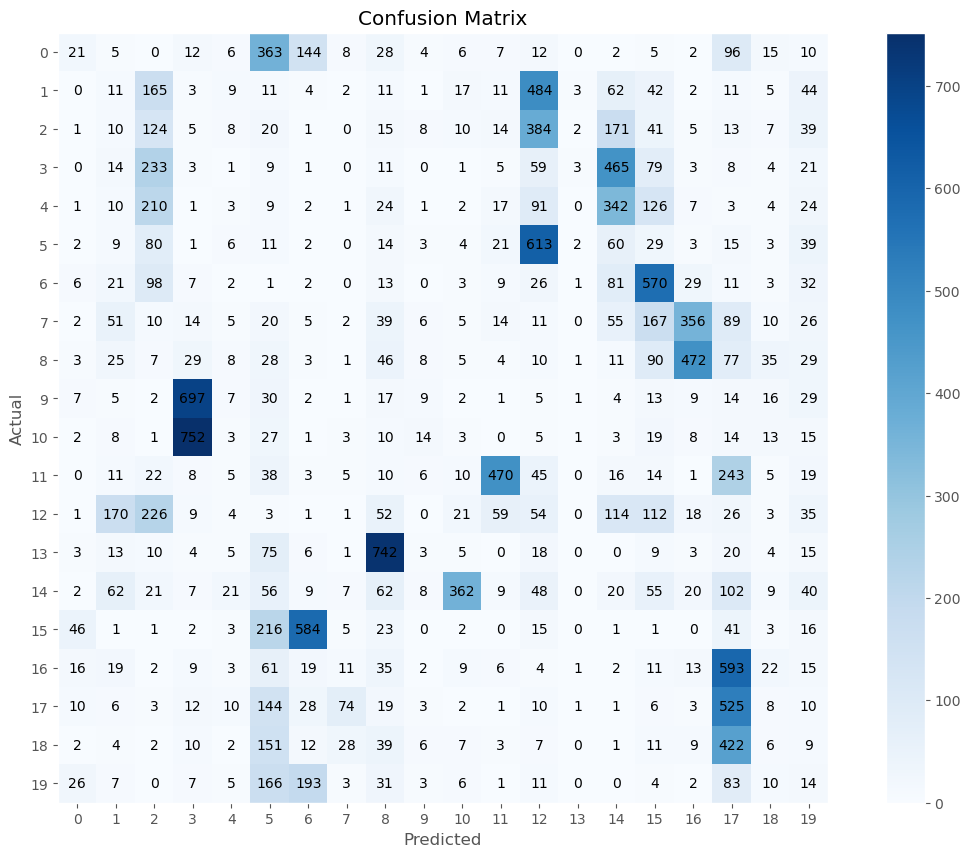

In [105]:
create_cm(labels, predictions)

In [107]:
cm = confusion_matrix(labels, predictions)
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print(cm.max(axis = 1).sum() / (len(labels)))

9615
0.5528403863845446


In [109]:
(cm.max(axis = 1)/cm.sum(axis = 1)).mean()

0.5485485290556497

In [172]:
cm = confusion_matrix(labels, kmeans_se.labels_)
max_ind = np.argmax(cm, axis = 1)
cm.max(axis = 1).sum()

7658

In [173]:
cm.max(axis = 1).sum() / (len(labels))

0.4403173873045078

In [116]:
doc_clean = [doc.split() for doc in docs]

dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creazione del modello LDA
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=20, id2word = dictionary, passes=50)


In [117]:
doc_topics = []
for doc in doc_term_matrix:
    # Ordina gli argomenti in base al punteggio e prendi l'argomento più alto
    sorted_topics = sorted(ldamodel[doc], key=lambda x: -x[1])
    dominant_topic = sorted_topics[0][0] if sorted_topics else None
    doc_topics.append(dominant_topic)

In [62]:
print(adjusted_rand_score(labels, doc_topics))
print(rand_score(labels, doc_topics))

0.14260793834365507
0.8893218436060442


In [64]:
sklearn.metrics.homogeneity_completeness_v_measure(labels, doc_topics)

(0.2701921688610393, 0.30182433886167526, 0.2851336338412702)

In [118]:
cm = confusion_matrix(labels, doc_topics)
max_ind = np.argmax(cm, axis = 1)
print(cm.max(axis = 1).sum())
print(cm.max(axis = 1).sum() / (len(labels)))
(cm.max(axis = 1)/cm.sum(axis = 1)).mean()

7890
0.45365685372585096


0.45894410933248075

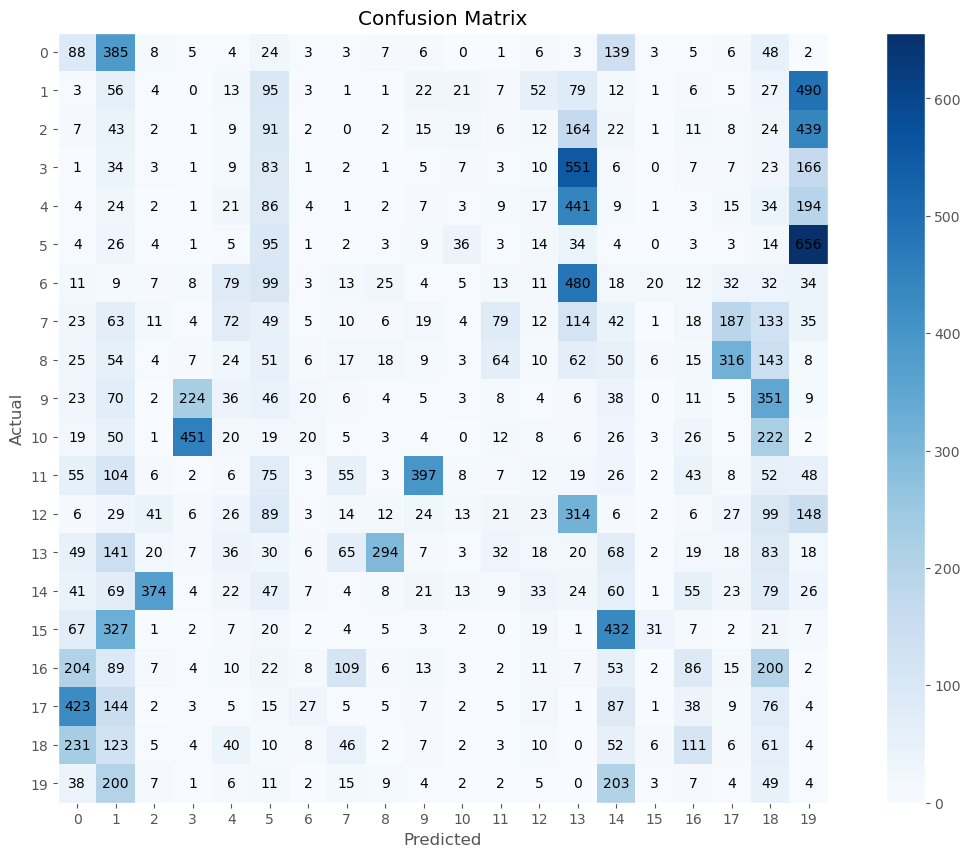

In [114]:
create_cm(labels, doc_topics)

In [62]:
def fed_to_BO(top_N, first_K, K, c, n_combinations):
    top_N = round(top_N)
    first_K = round(first_K)
    K = round(K)
    c = round(c)
    n_combinations = round(n_combinations)
#     sel_mod = round(sel_mod)
    seed_words = find_seed_words(top_N, first_K)
    embeddings = pivot_table.loc[seed_words, seed_words]
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_ = kmeans.fit(embeddings)
    cluster_kmeans = kmeans_.labels_
    cluster_dict = {}
    for i, clus in enumerate(cluster_kmeans):
        if clus not in cluster_dict:
            cluster_dict[clus] = []
        cluster_dict[clus].append(seed_words[i])
        
    matching_docs = {}

    # Iterazione sui documenti
    for idx, doc in enumerate(docs):
        word_counts = {cluster: [] for cluster in cluster_dict.keys()}  # Inizializzazione parole per cluster

        # Conteggio delle parole del documento presenti in ogni cluster
        for cluster, word_list in cluster_dict.items():
            for word in word_list:
                if word.lower() in doc.lower():
                    word_counts[cluster].append(word)

        # Verifica se il documento contiene almeno tre parole di uno stesso cluster
        for cluster, words in word_counts.items():
            if len(words) >= n_combinations:
                if idx in matching_docs:
                    matching_docs[idx][cluster] = words
                else:
                    matching_docs[idx] = {cluster: words}
    word_to_consider = {}
    for i, word in enumerate(list(binary_df.columns)):
        word_to_consider[word] = i
        
    np.random.seed(0)
    input1 = []
    input2 = []
    out = []
 
    idx_corp = []
    for key in matching_docs: #key sono gli indici del dataset
        for value in matching_docs[key]:
            list_triplets = return_random_triplets(matching_docs[key][value], K) # triplette random
            for i in range(len(list_triplets)): #triplette per ciascun cluster
                
                idx_corp.append(key)
                input1.append(np.array(binary_df.iloc[key, :]))
                input2.append(return_input2(list(list_triplets[i])))
                out.append(value)
    
    input1 = np.array(input1, dtype=np.float32)
    input2 = np.array(input2, dtype=np.float32)
    out = keras.utils.to_categorical(np.array(out), dtype=np.float32)
    inputs_stack = np.column_stack((input1, input2))
    
    class_counts = Counter(out.argmax(axis=1))
    min_class_count = min(class_counts.values())

    desired_count = c * min_class_count

    sampling_strategy = {cls: min(count, desired_count) for cls, count in class_counts.items()}

    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(inputs_stack, out)
    
    clf = MLPClassifier(random_state=0)
    clf.fit(X_resampled, np.argmax(y_resampled, axis = 1))
    predictions_prob = clf.predict_proba(np.column_stack((binary_df.values, np.zeros(binary_df.values.shape))))
    predictions = predictions_prob.argmax(axis = 1)
    ari = adjusted_rand_score(labels, predictions)
    return ari

In [63]:
pbounds = {
    'top_N': (180, 350),
    'first_K': (8, 18), 
    'K': (3, 10), 
    'c':(1, 3), 
    'n_combinations':(2, 4)
}

In [64]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(
    f=fed_to_BO,
    pbounds=pbounds,
    random_state=0,
)

optimizer.maximize(
    init_points=10,
    n_iter=150
)

|   iter    |  target   |     K     |     c     |  first_K  | n_comb... |   top_N   |
-------------------------------------------------------------------------------------


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 1         | 0.1424    | 6.842     | 2.43      | 14.03     | 3.09      | 252.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 2         | 0.09642   | 7.521     | 1.875     | 16.92     | 3.927     | 245.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 3         | 0.1259    | 8.542     | 2.058     | 13.68     | 3.851     | 192.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 4         | 0.05219   | 3.61      | 1.04      | 16.33     | 3.556     | 327.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 5         | 0.127     | 9.85      | 2.598     | 12.61     | 3.561     | 200.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 6         | 0.1284    | 7.479     | 1.287     | 17.45     | 3.044     | 250.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 7         | 0.1394    | 4.852     | 2.548     | 12.56     | 3.137     | 183.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 8         | 0.1072    | 7.323     | 2.224     | 14.17     | 3.887     | 295.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 9         | 0.1329    | 5.517     | 1.874     | 14.98     | 2.12      | 293.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 10        | 0.103     | 7.694     | 1.421     | 9.289     | 2.631     | 241.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 11        | 0.1131    | 6.939     | 1.64      | 15.25     | 2.089     | 258.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 12        | 0.08452   | 3.425     | 2.641     | 10.54     | 3.994     | 187.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 13        | 0.1489    | 6.713     | 1.638     | 15.01     | 2.335     | 251.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 14        | 0.102     | 3.865     | 1.0       | 14.7      | 2.0       | 251.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 15        | 0.1326    | 8.964     | 2.03      | 14.06     | 2.164     | 250.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 16        | 0.1228    | 6.818     | 3.0       | 14.74     | 3.589     | 249.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 17        | 0.07497   | 7.787     | 1.843     | 15.73     | 2.0       | 252.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 18        | 0.1287    | 6.362     | 2.243     | 13.66     | 2.742     | 251.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 19        | 0.1366    | 7.398     | 1.91      | 14.46     | 2.961     | 251.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 20        | 0.1368    | 6.345     | 1.509     | 15.0      | 2.868     | 250.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 21        | 0.1316    | 6.449     | 1.928     | 15.83     | 2.215     | 250.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 22        | 0.1367    | 8.316     | 2.828     | 12.96     | 3.585     | 252.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 23        | 0.06973   | 4.746     | 2.219     | 11.3      | 2.904     | 182.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 24        | 0.1315    | 7.587     | 2.618     | 13.47     | 2.155     | 252.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 25        | 0.1333    | 6.79      | 2.738     | 14.57     | 2.164     | 251.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 26        | 0.1332    | 5.843     | 2.829     | 13.04     | 3.416     | 183.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 27        | 0.106     | 4.202     | 2.505     | 13.81     | 3.15      | 184.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 28        | 0.114     | 8.07      | 1.907     | 12.71     | 2.93      | 251.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 29        | 0.1325    | 7.143     | 3.0       | 13.59     | 4.0       | 252.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 30        | 0.1138    | 7.532     | 1.217     | 14.98     | 2.377     | 249.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 31        | 0.0672    | 7.592     | 2.621     | 15.22     | 3.787     | 251.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 32        | 0.106     | 6.347     | 2.51      | 12.59     | 2.731     | 253.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 33        | 0.1047    | 7.782     | 2.238     | 14.75     | 2.098     | 250.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 34        | 0.1587    | 6.802     | 1.349     | 13.7      | 2.269     | 252.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 35        | 0.1367    | 7.273     | 1.65      | 14.15     | 2.699     | 251.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 36        | 0.1452    | 6.203     | 1.797     | 14.22     | 2.193     | 252.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 37        | 0.1486    | 6.464     | 1.0       | 14.22     | 2.0       | 251.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 38        | 0.1364    | 6.12      | 1.597     | 14.22     | 3.161     | 251.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 39        | 0.1215    | 8.919     | 2.416     | 12.68     | 3.672     | 253.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 40        | 0.1138    | 7.559     | 1.576     | 13.86     | 2.884     | 252.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 41        | 0.1002    | 6.103     | 1.757     | 15.27     | 2.602     | 251.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 42        | 0.1435    | 6.714     | 1.911     | 14.05     | 2.132     | 251.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 43        | 0.08984   | 6.135     | 1.329     | 13.8      | 2.698     | 251.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 44        | 0.1219    | 6.97      | 1.419     | 13.21     | 2.823     | 252.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 45        | 0.1496    | 7.735     | 1.728     | 13.84     | 2.212     | 251.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 46        | 0.1321    | 6.387     | 2.321     | 14.09     | 3.485     | 252.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 47        | 0.1444    | 7.246     | 1.004     | 14.46     | 2.138     | 251.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 48        | 0.1015    | 5.226     | 2.32      | 12.63     | 3.921     | 184.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 49        | 0.144     | 6.824     | 1.562     | 13.89     | 2.213     | 252.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 50        | 0.1339    | 5.672     | 2.696     | 13.47     | 3.124     | 182.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 51        | 0.1198    | 8.535     | 1.618     | 13.39     | 2.171     | 251.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 52        | 0.1472    | 7.246     | 1.778     | 14.95     | 2.098     | 251.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 53        | 0.1267    | 5.243     | 1.822     | 13.96     | 2.292     | 292.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 54        | 0.09791   | 6.101     | 1.615     | 13.77     | 2.655     | 252.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


| 55        | 0.1123    | 6.189     | 2.242     | 13.77     | 3.54      | 252.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 56        | 0.1207    | 8.784     | 1.976     | 15.35     | 2.838     | 241.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 57        | 0.1316    | 3.385     | 1.64      | 16.95     | 3.947     | 256.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 58        | 0.1679    | 7.138     | 1.189     | 13.94     | 2.0       | 251.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 59        | 0.1323    | 7.416     | 3.0       | 13.47     | 3.199     | 251.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 60        | 0.1015    | 7.368     | 2.575     | 13.47     | 2.274     | 251.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 61        | 0.1225    | 4.869     | 2.125     | 13.31     | 3.929     | 182.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 62        | 0.1529    | 7.056     | 2.299     | 14.48     | 2.04      | 252.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 63        | 0.1298    | 4.488     | 1.811     | 15.36     | 2.138     | 292.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 64        | 0.1381    | 7.966     | 1.169     | 14.36     | 2.232     | 251.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 65        | 0.1155    | 5.337     | 3.0       | 12.83     | 2.44      | 183.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 66        | 0.139     | 7.041     | 1.086     | 12.94     | 2.014     | 251.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 67        | 0.15      | 7.264     | 1.134     | 15.31     | 2.543     | 251.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 68        | 0.1436    | 7.529     | 1.862     | 14.27     | 2.17      | 251.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 69        | 0.1323    | 8.096     | 1.014     | 13.76     | 2.213     | 251.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 70        | 0.1481    | 6.585     | 1.371     | 14.23     | 2.505     | 252.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 71        | 0.1222    | 6.605     | 2.643     | 14.22     | 2.006     | 251.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 72        | 0.15      | 5.297     | 1.004     | 15.31     | 2.987     | 293.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 73        | 0.1366    | 5.715     | 1.115     | 15.59     | 2.712     | 292.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 74        | 0.1512    | 6.956     | 1.0       | 15.36     | 2.0       | 250.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 75        | 0.03492   | 4.895     | 1.107     | 15.79     | 3.528     | 292.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 76        | 0.1255    | 5.179     | 1.681     | 14.51     | 3.466     | 293.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 77        | 0.1383    | 4.675     | 2.172     | 16.41     | 3.016     | 288.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 78        | 0.142     | 3.21      | 2.32      | 11.8      | 2.285     | 331.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 79        | 0.136     | 4.261     | 1.602     | 15.14     | 2.097     | 292.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 80        | 0.1203    | 5.149     | 1.556     | 16.05     | 2.194     | 293.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 81        | 0.08724   | 8.047     | 1.399     | 17.77     | 3.653     | 268.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 82        | 0.1367    | 4.481     | 1.027     | 14.33     | 2.107     | 293.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 83        | 0.1158    | 6.39      | 1.165     | 15.5      | 2.056     | 293.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 84        | 0.1547    | 7.685     | 1.2       | 15.22     | 2.232     | 251.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 85        | 0.1431    | 7.69      | 1.5       | 16.12     | 2.175     | 250.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 86        | 0.1288    | 7.165     | 1.163     | 16.53     | 2.016     | 250.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 87        | 0.1318    | 4.113     | 2.644     | 11.51     | 2.336     | 330.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 88        | 0.1331    | 3.194     | 1.891     | 11.58     | 3.224     | 331.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 89        | 0.1377    | 7.339     | 1.244     | 15.34     | 2.586     | 250.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


| 90        | 0.0802    | 4.18      | 1.773     | 15.69     | 3.597     | 288.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 91        | 0.1222    | 7.474     | 1.0       | 15.88     | 2.0       | 251.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 92        | 0.1358    | 5.918     | 2.807     | 12.79     | 3.405     | 183.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 93        | 0.128     | 3.0       | 2.206     | 11.63     | 2.408     | 330.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 94        | 0.1439    | 4.822     | 2.166     | 14.61     | 3.94      | 335.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 95        | 0.1163    | 5.419     | 2.46      | 15.08     | 3.616     | 335.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 96        | 0.1196    | 4.246     | 1.882     | 14.16     | 4.0       | 334.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 97        | 0.1368    | 5.589     | 1.428     | 14.41     | 2.777     | 293.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 98        | 0.131     | 5.232     | 2.459     | 16.89     | 2.533     | 287.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 99        | 0.1444    | 7.757     | 1.0       | 14.81     | 2.744     | 251.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 100       | 0.1362    | 3.769     | 1.923     | 12.33     | 2.46      | 331.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 101       | 0.1314    | 6.973     | 1.322     | 14.62     | 2.0       | 251.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 102       | 0.1051    | 3.559     | 2.615     | 11.11     | 2.647     | 331.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 103       | 0.1142    | 8.701     | 2.153     | 11.84     | 2.309     | 264.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 104       | 0.1244    | 8.978     | 2.66      | 14.11     | 2.364     | 274.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 105       | 0.1329    | 4.707     | 2.416     | 17.08     | 2.226     | 288.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 106       | 0.1347    | 4.972     | 2.056     | 16.7      | 3.197     | 287.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 107       | 0.1507    | 5.339     | 1.0       | 15.01     | 2.488     | 293.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 108       | 0.1368    | 3.166     | 1.591     | 12.45     | 2.424     | 330.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 109       | 0.1215    | 8.789     | 2.384     | 17.83     | 3.768     | 218.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 110       | 0.1144    | 4.039     | 2.847     | 15.13     | 3.964     | 315.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 111       | 0.07422   | 5.283     | 1.285     | 13.92     | 2.417     | 293.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 112       | 0.1358    | 6.14      | 2.197     | 13.66     | 3.066     | 251.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 113       | 0.1374    | 5.565     | 1.272     | 14.4      | 2.547     | 293.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 114       | 0.155     | 7.956     | 1.228     | 14.68     | 2.078     | 250.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 115       | 0.1283    | 8.172     | 1.3       | 13.75     | 2.013     | 251.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 116       | 0.1293    | 3.142     | 2.056     | 11.9      | 3.218     | 331.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 117       | 0.075     | 9.388     | 2.967     | 15.11     | 2.704     | 215.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 118       | 0.09986   | 6.979     | 2.636     | 16.67     | 2.519     | 217.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 119       | 0.1354    | 6.298     | 1.247     | 14.56     | 2.49      | 292.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 120       | 0.1504    | 4.038     | 1.392     | 12.06     | 2.844     | 330.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 121       | 0.1487    | 6.704     | 1.298     | 14.91     | 2.0       | 250.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 122       | 0.1383    | 6.089     | 2.253     | 13.72     | 3.057     | 252.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 123       | 0.105     | 6.023     | 2.824     | 15.01     | 3.984     | 271.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 124       | 0.1436    | 3.8       | 1.479     | 11.71     | 2.201     | 330.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 125       | 0.1407    | 4.249     | 1.043     | 12.44     | 2.939     | 330.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 126       | 0.1012    | 6.621     | 2.492     | 14.53     | 2.577     | 252.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 127       | 0.08141   | 5.393     | 2.528     | 9.835     | 3.701     | 199.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 128       | 0.06125   | 6.2       | 1.05      | 16.35     | 2.692     | 201.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 129       | 0.1288    | 4.531     | 1.773     | 16.27     | 2.293     | 218.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 130       | 0.1121    | 4.081     | 1.809     | 12.44     | 2.39      | 330.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 131       | 0.1301    | 3.528     | 2.112     | 12.08     | 3.08      | 331.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 132       | 0.109     | 6.22      | 1.962     | 14.05     | 3.596     | 296.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 133       | 0.09131   | 8.335     | 2.546     | 16.72     | 3.555     | 240.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 134       | 0.09853   | 4.831     | 2.768     | 17.8      | 3.716     | 194.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 135       | 0.1557    | 8.885     | 1.724     | 8.654     | 2.804     | 293.1     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 136       | 0.1175    | 9.395     | 1.537     | 9.538     | 2.602     | 292.5     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 137       | 0.07597   | 6.621     | 2.105     | 8.062     | 2.598     | 196.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 138       | 0.1486    | 8.262     | 1.92      | 9.223     | 2.212     | 292.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 139       | 0.1489    | 7.408     | 1.813     | 14.67     | 3.17      | 251.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 140       | 0.139     | 5.98      | 1.089     | 14.8      | 2.863     | 293.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 141       | 0.1552    | 8.637     | 1.339     | 8.389     | 2.144     | 292.4     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 142       | 0.1178    | 8.17      | 1.728     | 8.045     | 2.515     | 293.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 143       | 0.1105    | 4.105     | 2.267     | 16.61     | 2.004     | 340.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 144       | 0.05812   | 8.344     | 1.007     | 12.11     | 2.645     | 185.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 145       | 0.1538    | 8.23      | 1.633     | 8.874     | 2.612     | 292.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 146       | 0.1549    | 8.842     | 2.477     | 8.827     | 3.18      | 293.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 147       | 0.1417    | 8.356     | 1.613     | 9.502     | 2.279     | 291.7     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 148       | 0.1421    | 9.016     | 2.077     | 8.778     | 2.745     | 292.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 149       | 0.1468    | 8.601     | 1.82      | 8.37      | 2.2       | 292.0     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 150       | 0.1474    | 8.512     | 2.692     | 8.932     | 2.088     | 292.3     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 151       | 0.1325    | 8.782     | 1.471     | 9.31      | 3.273     | 293.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 152       | 0.1505    | 7.98      | 2.167     | 8.891     | 3.32      | 291.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 153       | 0.1431    | 8.011     | 2.715     | 8.329     | 2.734     | 291.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 154       | 0.1507    | 8.235     | 2.102     | 8.835     | 2.81      | 293.2     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 155       | 0.1369    | 7.767     | 2.673     | 8.757     | 2.667     | 292.6     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 156       | 0.1142    | 8.228     | 1.978     | 8.345     | 3.95      | 292.9     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 157       | 0.1404    | 7.699     | 1.898     | 8.859     | 2.488     | 291.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 158       | 0.1078    | 8.492     | 2.341     | 9.847     | 2.592     | 292.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 159       | 0.1625    | 4.389     | 1.594     | 11.42     | 3.145     | 330.8     |


/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 160       | 0.1267    | 4.896     | 1.614     | 11.3      | 3.533     | 330.7     |


In [ ]:
def plot_topics(topic_representations):
    tt = [topics[:10] for topics in topic_representations]
    texts = [' \n '.join(text) for text in tt]

    fig, axs = plt.subplots(4, 5, figsize=(10, 15))

    for i, ax in enumerate(axs.flatten()):
        if i < len(texts):
            ax.text(0.5, 0.5, texts[i], fontsize=12, ha='center', va='center',
                  bbox=dict(facecolor='black', edgecolor='black'), color = 'white')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.show()
plot_topics(topic_representations)

In [ ]:
inp1 = Input(shape=(input1.shape[1], ))
inp2 = Input(shape=(input2.shape[1], ))
inputs = [inp1, inp2]
input_c = Concatenate()(inputs)
hidden1 = Dense(256, activation="relu")(input_c)
dropout1 = Dropout(0.2)(hidden1, training=True) # MC Dropout after first Dense layer
hidden2 = Dense(256, activation="relu")(hidden1)
dropout2 = Dropout(0.3)(hidden2, training=True) # MC Dropout after second Dense layer
outs = Dense(out.shape[1], activation='softmax')(hidden1)

model_softmax = Model(inputs=[inp1, inp2], outputs=outs)
model_softmax.compile(keras.optimizers.legacy.Adam(learning_rate=0.01), loss=keras.losses.CategoricalCrossentropy())
# model_softmax.summary()

model_softmax.fit([input1, input2], out, epochs = 50)
predictions = model_softmax.predict([X_pred, X_pred])
topic_representations = extract_topic_representations(predictions)
documents = [doc.split() for doc in docs]
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_npmi')
coherence = cm.get_coherence()
print(f'Topic Coherence C_NPMI: {coherence}')
cm = CoherenceModel(topics=topic_representations, texts = documents, dictionary = dictionary, coherence='c_uci')
coherence = cm.get_coherence()
print(f'Topic Coherence C_UCI: {coherence}')
print('Topic diveristy is: {}'.format(calculate_topic_diversity(topic_representations)))

In [ ]:
# n_combinations = 2
# NPMI = 0.67
# UCI = 1.3

In [ ]:
topics = [
    "Components and Features of Bicycles",
    "Sexual Orientation and Morality",
    "Computer Hardware and Configuration",
    "Understanding Human Behavior and Thought",
    "Medical Conditions and Treatments",
    "Cryptography and Data Security",
    "Sports and Gameplay",
    "Space Exploration and Celestial Bodies",
    "Homes and Domestic Incidents",
    "Law, Crime, and Governance",
    "Christian Theology and Beliefs",
    "Communication and Distribution",
    "Reading, Communication, and Experience",
    "Religion, Existence, and Philosophy",
    "Computer Software and User Interface",
    "Educational Institutions and Personnel",
    "Christian Teachings and Concepts",
    "Marketplace, Product Conditions, and Sales",
    "Technology Performance and Specifications",
    "Software Development and File Management"
]


In [ ]:
topics = [
    "Bicycles",
    "Sexuality",
    "Hardware",
    "Behavior",
    "Medicine",
    "Cryptography",
    "Sports",
    "Space",
    "Domesticity",
    "Governance",
    "Theology",
    "Communication",
    "Experience",
    "Philosophy",
    "Software",
    "Education",
    "Faith",
    "Commerce",
    "Performance",
    "Development"
]


In [ ]:
topic_representations

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

class ZeroShotClassifier:
    def __init__(self):
        # Caricamento del modello e del tokenizer
        model_name = "facebook/bart-large-mnli"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.classifier = pipeline("zero-shot-classification", model=self.model, tokenizer=self.tokenizer)

    def predict(self, text, labels):
        """
        Classifica il testo nelle etichette fornite.
        
        Args:
        - text (str): Il testo da classificare.
        - labels (list): Una lista di etichette possibili.
        
        Returns:
        - dict: Un dizionario con 'sequence', 'labels', e 'scores'.
        """
        return self.classifier(text, labels)


In [ ]:
topics = []
for topic in topic_representations:
    string = ''
    for word in topic:
        string = string + ', ' + word
    topics.append(string[2:])

In [ ]:
topics

In [ ]:
documents = [doc.lower() for doc in data['data']]

# Remove punctuation and trailing lines
# documents_processed = [re.sub(r'[^\w\s]', '', doc).strip().lower() for doc in documents]
documents_processed = [re.sub('[\t\n]', ' ', doc).strip() for doc in documents]

In [ ]:
import random
iid = random.sample(range(len(documents_processed)), 650)
sample = np.array(documents_processed)[iid]

In [ ]:
sample_filtered = []
for samp in sample: 
    if len(samp) > 20:
        sample_filtered.append(samp)

In [ ]:
pd.DataFrame(np.array(sample_filtered)[:600], columns = ['Text']).to_csv('samples.csv')

In [ ]:
scores = []
out_labels = []
if __name__ == "__main__":
    classifier = ZeroShotClassifier()
    for k, doc_ in enumerate(sample):
        print('********************************')
        print(k)
        text = doc_
        labels = topics
        predictions = classifier.predict(text, labels)
        out_labels.append(predictions['labels'])
        scores.append(predictions['scores'])
        print(doc_)
        print(predictions['labels'])
        print(predictions['scores'])


In [ ]:
documents_processed[0]

In [ ]:
classifier = ZeroShotClassifier()
text = documents_processed[120]
labels = topics
predictions = classifier.predict(text, labels)

In [ ]:
documents_processed[120]

In [ ]:
predictions

In [ ]:
topics

In [ ]:
dic_topics = {}
for i, top in enumerate(topics):
    dic_topics[top] = i

In [ ]:
lab_zeroshot = []
for lab in out_labels:
    lab_zeroshot.append(dic_topics[lab[0]])

In [ ]:
len(lab_zeroshot)

In [ ]:
out_labels

In [ ]:
scores

In [ ]:
np.column_stack((lab_zeroshot, data['target'][:63]))

In [ ]:
adjusted_rand_score(data['target'][:63], lab_zeroshot)

In [ ]:
length = 15
def remove_few_words_docs(length, dd):
    docs = []
    for i, d in enumerate(dd):
        if len(d)>length:
            docs.append(d)
    return docs
documents_processed = remove_few_words_docs(15, documents_processed)